## Predicting Loan Default Risk

In this project, the goal is to build a classification model that predicts whether a loan applicant is likely to default on a loan.  Different machine learning algorithms such as logistic regression, decision trees, and random forest to identify the best-performing model are employed. Additionally, feature engineering will play a critical role in improving model performance by handling missing values, scaling, and encoding categorical variables.

In [1]:
### Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Data Ingestion
df=pd.read_csv("Loan_default.csv")

In [3]:
print(df.head(2))

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               4         15.23        36      0.44  Bachelor's   
1               1          4.81        60      0.68    Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  


In [4]:
df.shape

(255347, 18)

In [5]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [6]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [7]:
# mapping education categorical data to numerics
education_mapping = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}

df['Education'] = df['Education'].map(education_mapping)

# mapping employmenType categorical data to numerics
employmentType_mapping = {
    "Unemployed": 1,
    "Self-employed": 2,
    "Part-time": 3,
    "Full-time": 4
}
df['EmploymentType']=df['EmploymentType'].map(employmentType_mapping)

maritalstatus_mapping={
    "Single":1,
    "Married":2,
    "Divorced":3
}

df['MaritalStatus']=df["MaritalStatus"].map(maritalstatus_mapping)

hasmortgage_mapping={
    "Yes":0,
    "No":1
}

df["HasMortgage"]=df["HasMortgage"].map(hasmortgage_mapping)

loanpurpose_mapping={
    "Auto":1,
    "Business":2,
    "Education":3,
    "Home":4,
    "Other":5
}

df["LoanPurpose"]=df["LoanPurpose"].map(loanpurpose_mapping)

hasdependent_mapping={
    "Yes": 1,
    "No": 0
}
df["HasDependents"]=df["HasDependents"].map(hasdependent_mapping)
hascosigner_mapping={
    "Yes": 1,
    "No": 0
}

df["HasCoSigner"]=df["HasCoSigner"].map(hascosigner_mapping)

In [8]:
### Data Cleaning
nulls=df.isnull().sum()
print(f"The null variables: {nulls}")

dupl=df.duplicated().sum()
print(f"The duplicated variables: {dupl}")

The null variables: LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
The duplicated variables: 0


In [9]:
# Convert numeric columns to the appropriate data type if necessary
numeric_columns = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 
    'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'
]


In [10]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [11]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object

### Statistical Analysis

In [12]:
desc_stats=df.describe()
desc_stats

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,2.496235,2.499904,2.000082,0.499986,0.500268,3.000501,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.117212,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,2.000000,3.000000,2.000000,0.000000,1.000000,3.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,3.000000,3.000000,3.000000,1.000000,1.000000,4.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,4.000000,4.000000,3.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [13]:
df=df.drop("LoanID", axis=1)


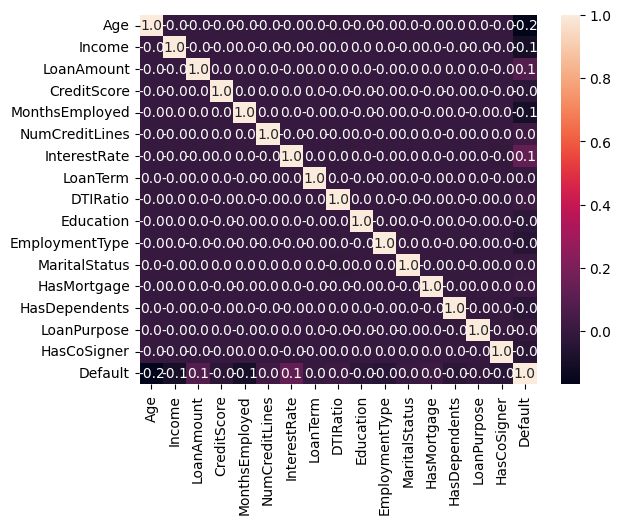

In [14]:
# Correlation matrix
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.show()


#### Logistic Regression to predict loan default

In [16]:
from sklearn.linear_model import LogisticRegression
X = df[['Income', 'CreditScore', 'LoanAmount', 'Age']]  # Predictor variables
y = df['Default']  # Target variable (classification)
log_reg = LogisticRegression().fit(X, y)
print("Logistic regression coefficients:", log_reg.coef_)


Logistic regression coefficients: [[-8.42903001e-06 -7.07172186e-04  4.03957954e-06 -3.75657772e-02]]


In summary, the coefficients tell us:

+ Income and CreditScore have a very small but negative association with default, suggesting higher income and credit scores may slightly reduce default likelihood.
+ LoanAmount has a very small positive association with default, indicating that higher loan amounts may slightly increase default likelihood.
+ Age has the most substantial impact, with older individuals less likely to default.
The small magnitude of some coefficients suggests these features may not have a strong effect individually, or the data may need scaling, regularization, or feature engineering to improve interpretability and predictive power.

In [17]:
from scipy.stats import chi2_contingency

# Chi-square test between Education and Default status
contingency_table = pd.crosstab(df['Education'], df['Default'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")


Chi-Square Test: chi2=214.01898255592704, p-value=3.9404864175508716e-46


#### Chi-Square Test Results
+ Chi-Square Statistic (chi2=214.02): This value indicates the strength of the association between Education and Default. A higher Chi-Square value suggests a stronger association between the two variables.

+ p-value (p=3.94e-46): This is the probability of observing such a strong association (or stronger) purely by chance if, in reality, there was no association between Education and Default.

#### Interpreting the p-value
Since the p-value is extremely small (much less than a typical significance level of 0.05), we can conclude that there is a statistically significant association between Education and Default. This means that differences in education levels are likely related to differences in default rates, and this result is unlikely due to random chance.

In [18]:
from scipy.stats import f_oneway

# One-way ANOVA for LoanAmount across different Education levels
anova_result = f_oneway(df[df['Education'] == 1]['LoanAmount'],
                        df[df['Education'] == 2]['LoanAmount'],
                        df[df['Education'] == 3]['LoanAmount'])
print(f"ANOVA result: F={anova_result.statistic}, p-value={anova_result.pvalue}")


ANOVA result: F=0.4307864695498097, p-value=0.6499983191953783


#### ANOVA Test Results
F-Statistic (F=0.43): This value measures the variance in LoanAmount between the different Education groups relative to the variance within each group. A higher F-statistic would indicate more variation between groups than within groups.

p-value (p=0.65): This is the probability of observing such a result (or one more extreme) if there were no actual differences in LoanAmount across Education levels.

#### Interpreting the p-value
Since the p-value (0.65) is much higher than a typical significance level of 0.05, we do not have enough evidence to reject the null hypothesis. This means that the differences in average LoanAmount across different Education levels are not statistically significant.